# Matplotlib features

## Import modules

In [80]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
import pandas as pd
import datetime

## Print available aesthetic styles

In [18]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Choose appropriate aesthetic styles

In [58]:
plt.style.use('classic')

# plt.style.use('seaborn-v0_8-whitegrid')

## Plot and save to file

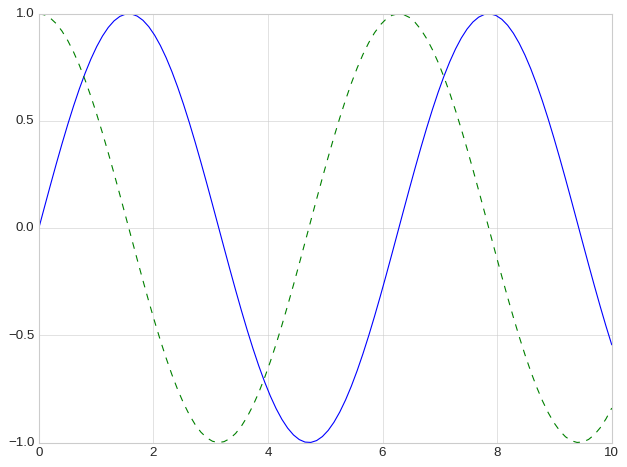

In [43]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');
plt.tight_layout()
fig.savefig('./output/sic_cos.png')

## The list of supported file types

In [21]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

## Adjusting the Plot: Line Colors

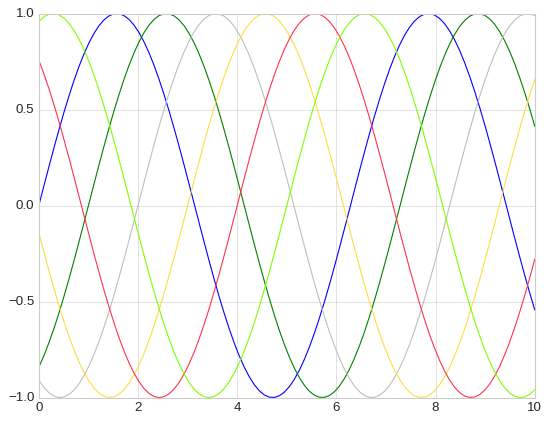

In [22]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x - 0), color='blue') # specify color by name
plt.plot(x, np.sin(x - 1), color='g') # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75') # grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44') # hex code (RRGGBB, 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # HTML color names supported

## Adjusting the Plot: Line Styles

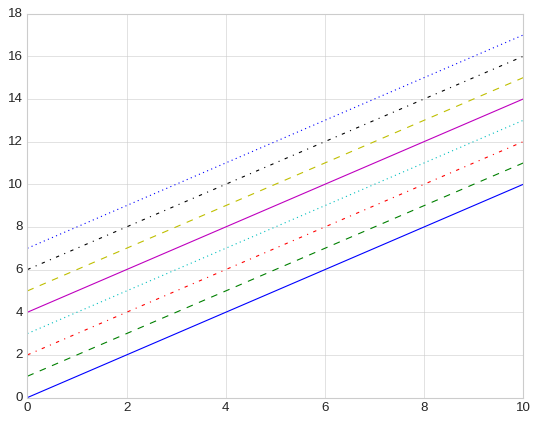

In [24]:
x = np.linspace(0, 10, 100)
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-') # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':'); # dotted

## Set all properties at once

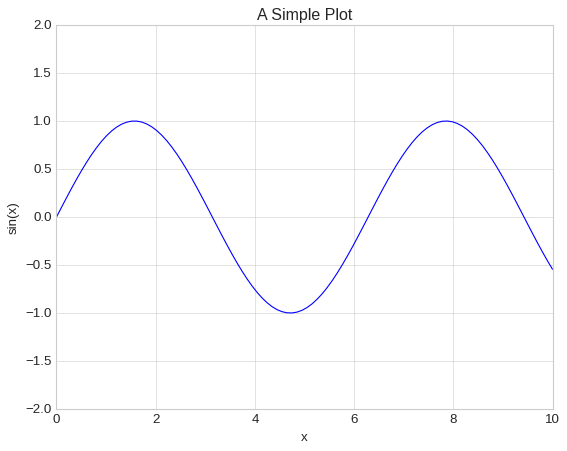

In [25]:
x = np.linspace(0, 10, 100)
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2), xlabel='x', ylabel='sin(x)', title='A Simple Plot');

## Scatter plot with varius markers

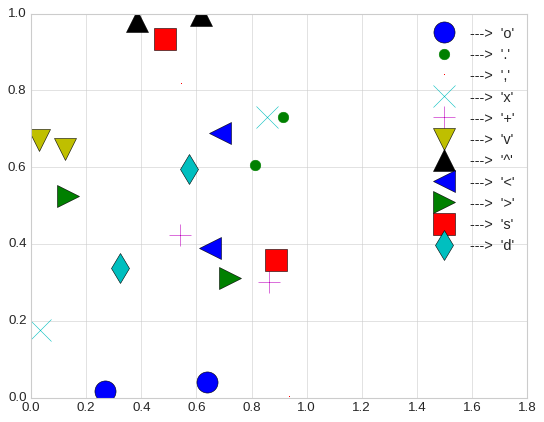

In [36]:
rng = np.random.default_rng(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.random(2), rng.random(2), marker, markersize=19, label="--->  '{0}'".format(marker))
plt.legend(numpoints=1, fontsize=13)
plt.xlim(0, 1.8);

## Scatter plot in gray scale

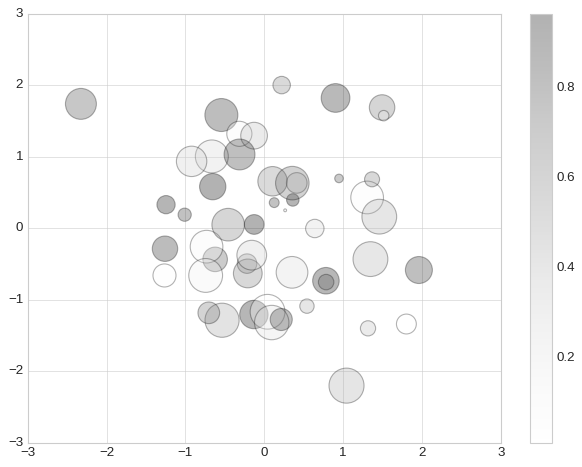

In [48]:
rng = np.random.default_rng(0)
pointno = 50
x = rng.normal(size=pointno)
y = rng.normal(size=pointno)
colors = rng.random(pointno)
sizes = 1000 * rng.random(pointno)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)
plt.colorbar(); # show color scale
plt.tight_layout()
plt.savefig('./output/scatter_plot.png')

## Density and Contour Plots

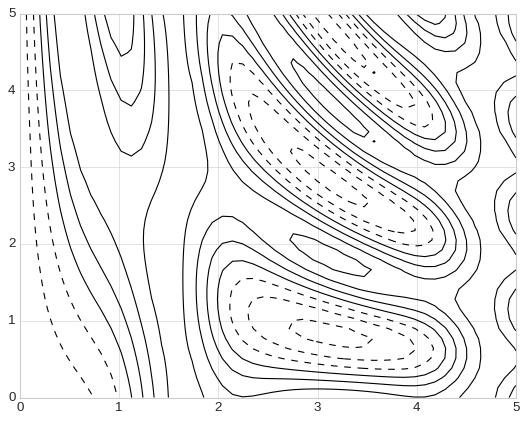

In [55]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, colors='black');

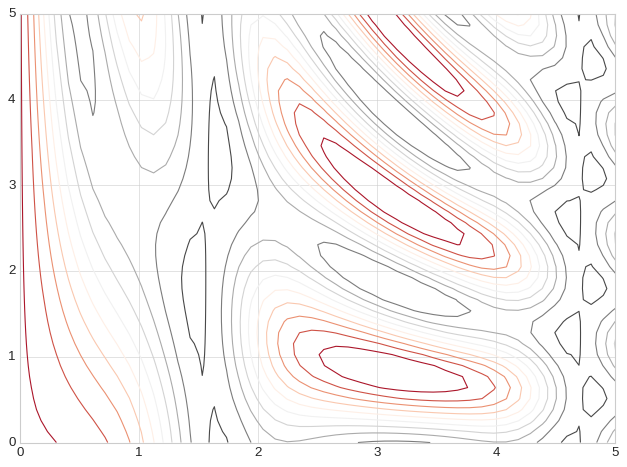

In [54]:
plt.contour(X, Y, Z, 10, cmap='RdGy');
plt.tight_layout()
plt.savefig('./output/contour_plot.png')

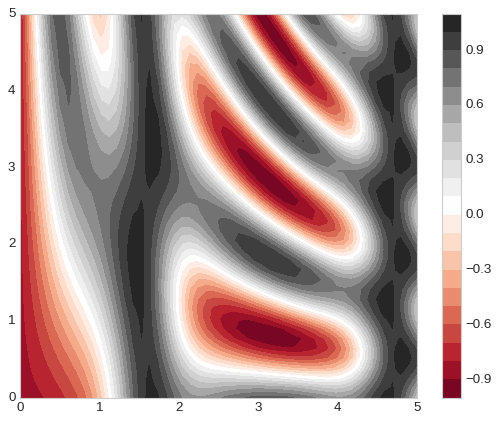

In [56]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

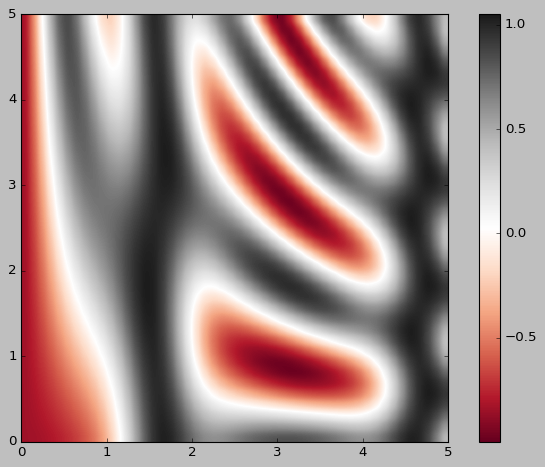

In [61]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', interpolation='gaussian', aspect='equal')
plt.colorbar();
plt.tight_layout()
plt.savefig('./output/density_plot.png')

## Histograms of several distributions

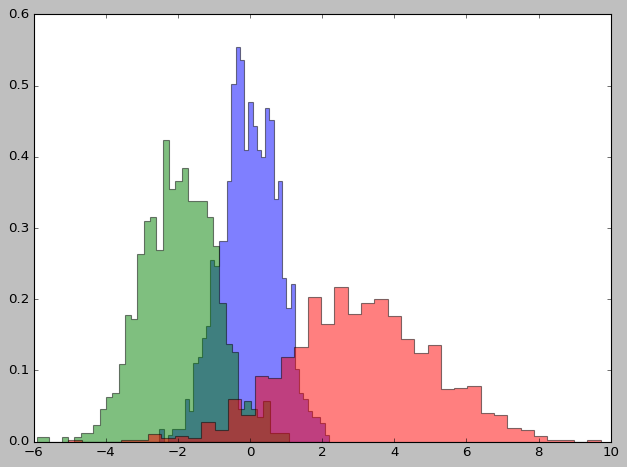

In [66]:
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.5, density=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);
plt.tight_layout()
plt.savefig('./output/overapling_histograms.png')

## Legend for Size of Points

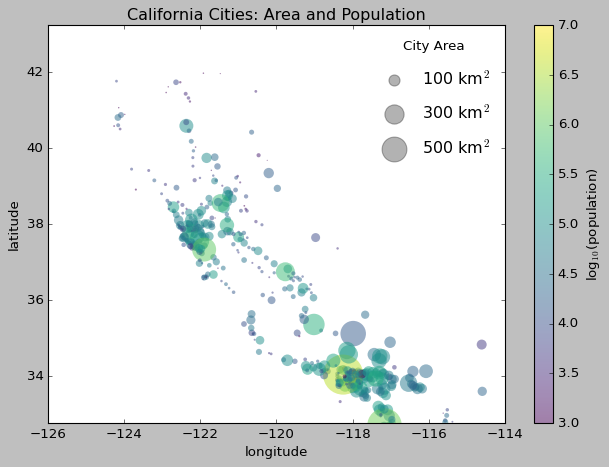

In [71]:
cities = pd.read_csv('./input/california_cities.csv')
# Extract the data we are interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']
# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None, c=np.log10(population), cmap='viridis', s=area, linewidth=0, alpha=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)
# Here we create a legend: we will plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1,
title='City Area')
plt.title('California Cities: Area and Population');
plt.tight_layout()
plt.savefig('./output/population.png')

## Sample of handwritten digits data

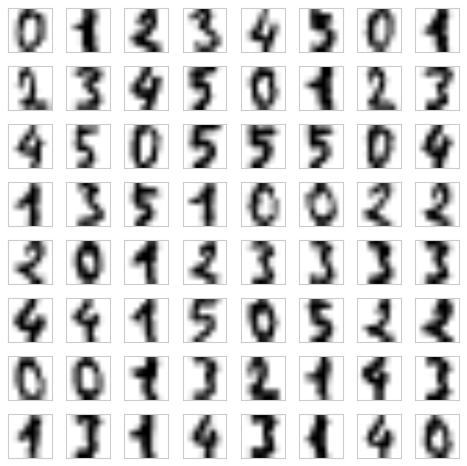

In [77]:
from sklearn.datasets import load_digits
plt.style.use('seaborn-v0_8-whitegrid')
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[]);
plt.tight_layout()
plt.savefig('./output/handwritten_digits.png')

## Effect of Holidays on US Births

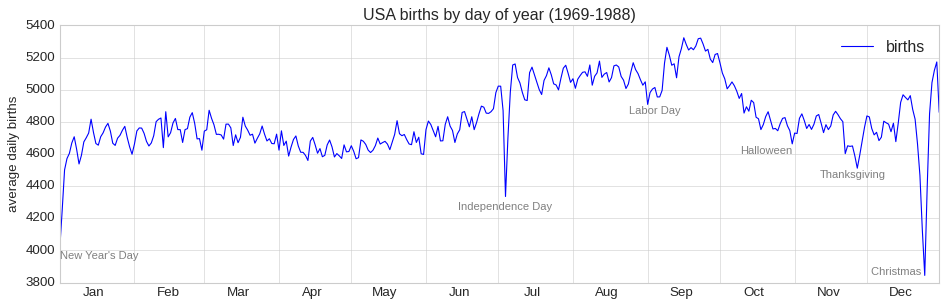

In [85]:
births = pd.read_csv('./input/births.csv')
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [datetime.datetime(2012, month, day) for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')

# Format the x-axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
plt.tight_layout()
plt.savefig('./output/holidays.png')

## Plot with annotations

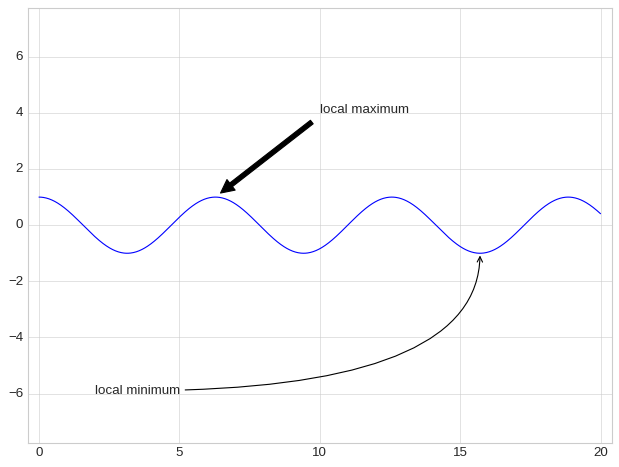

In [87]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6), arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));
plt.tight_layout()
plt.savefig('./output/annotations.png')

## Minor ticks within logarithmic plots

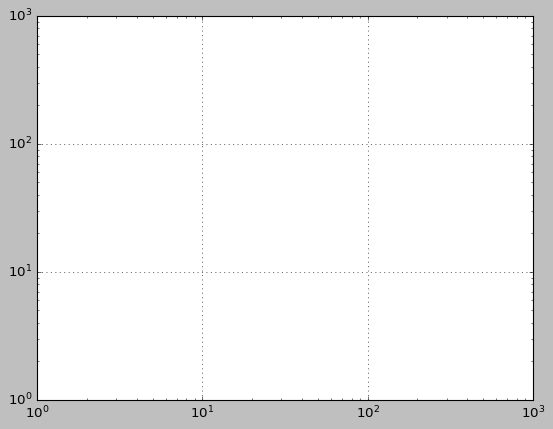

In [91]:
plt.style.use('classic')
ax = plt.axes(xscale='log', yscale='log')
ax.set(xlim=(1, 1E3), ylim=(1, 1E3))
ax.grid(True);
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

## Hiding Ticks or Labels

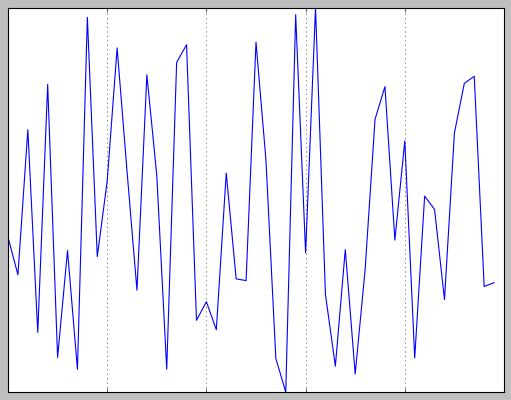

In [92]:
ax = plt.axes()
rng = np.random.default_rng(1701)
ax.plot(rng.random(50))
ax.grid()
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/romz/scikit_learn_data


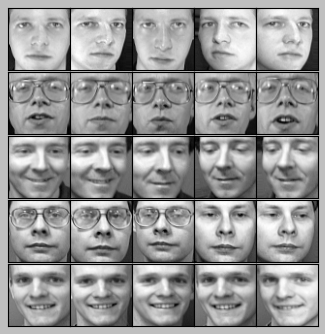

In [93]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)
# Get some face data from Scikit-Learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images
for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='binary_r')

## A default plot with crowded ticks

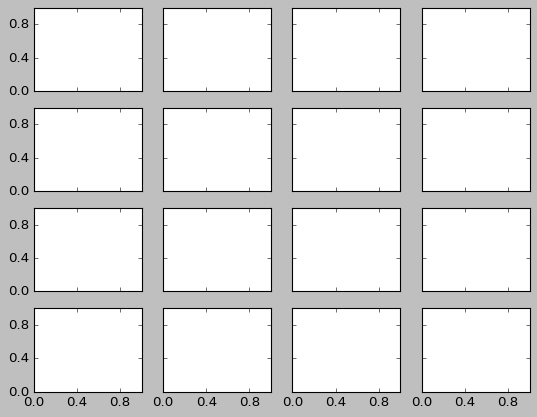

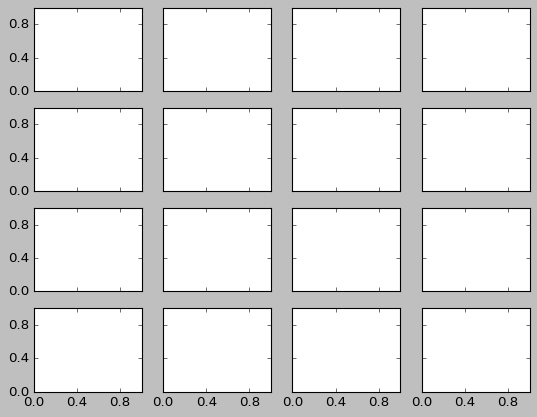

In [95]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

## Fancy Tick Formats

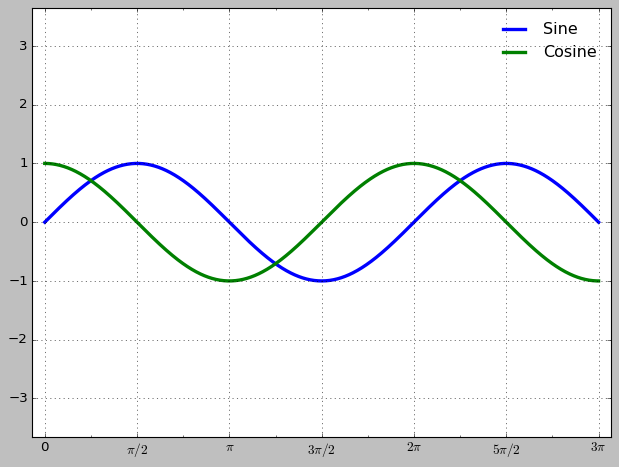

In [103]:
# user-defined function giving fine-grained control over the tick outputs
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return rf"${N}\pi/2$"
    else:
        return rf"${N // 2}\pi$"


# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.tight_layout()
plt.savefig('./output/tick.png')

## Changing the Defaults: rcParams. These settings can be saved in a '.matplotlibrc' file

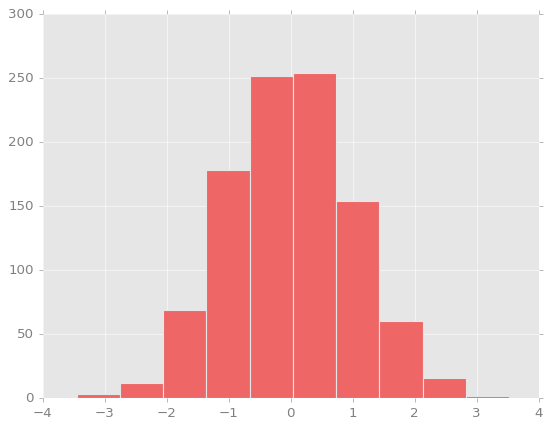

In [104]:
from matplotlib import cycler
colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='white')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
x = np.random.randn(1000)
plt.hist(x);

## Present all available stles

Solarize_Light2


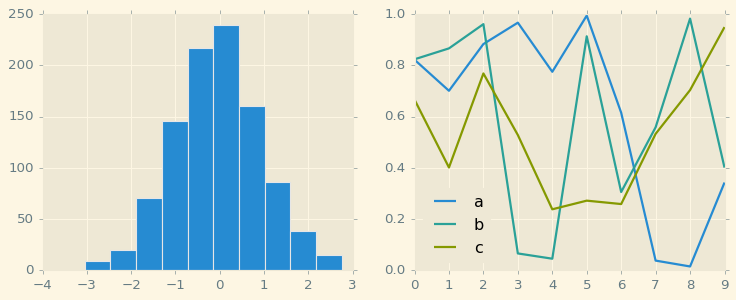

_classic_test_patch


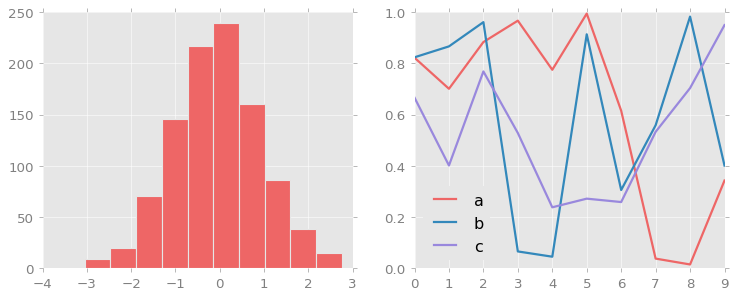

_mpl-gallery


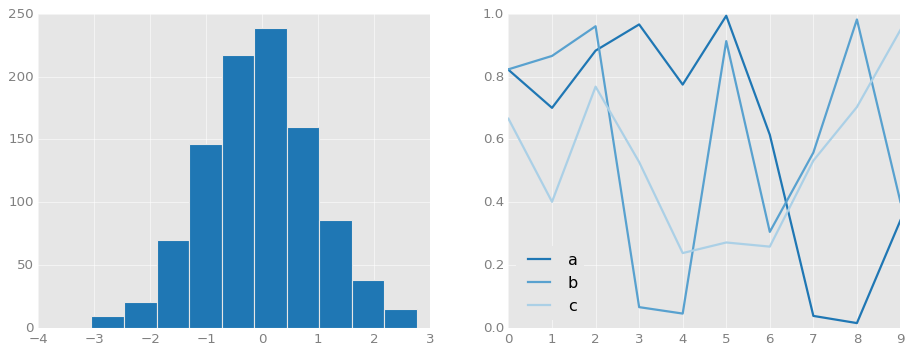

_mpl-gallery-nogrid


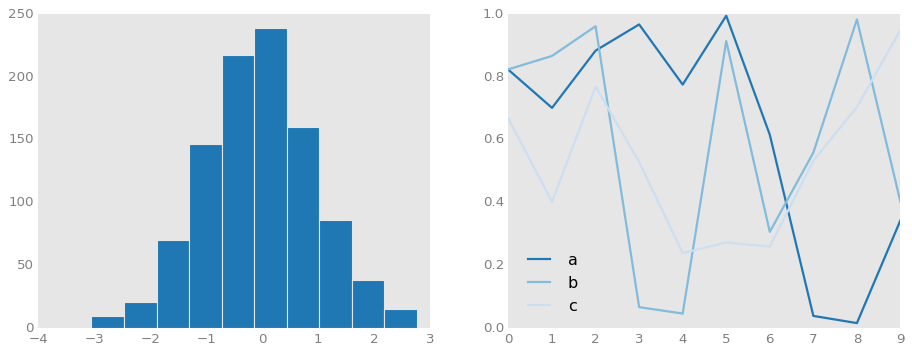

bmh


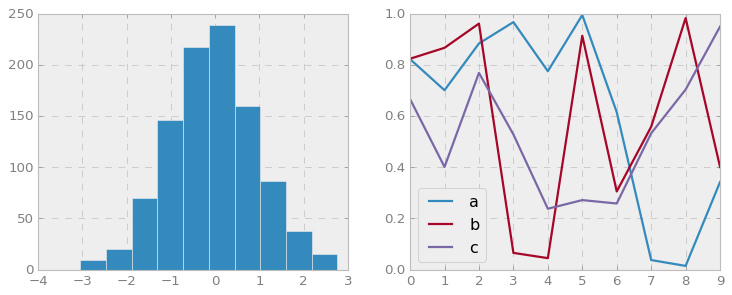

classic


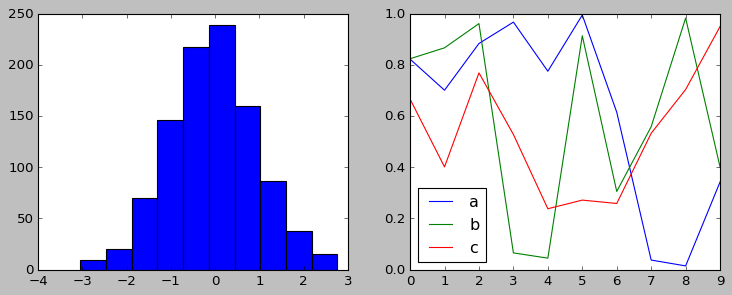

dark_background


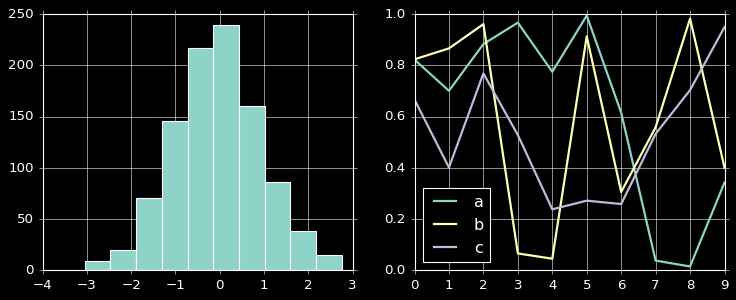

fast


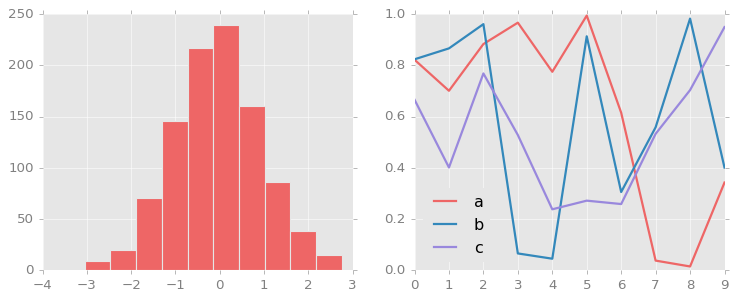

fivethirtyeight


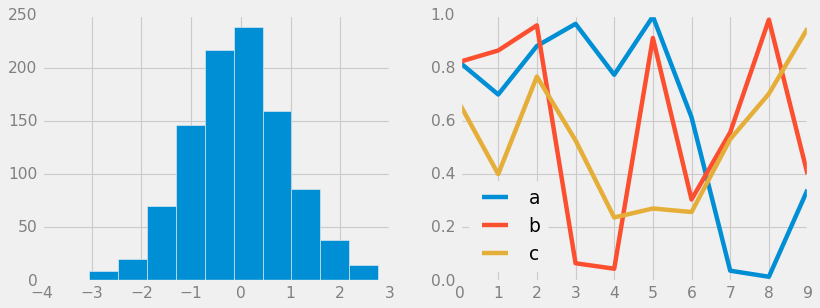

ggplot


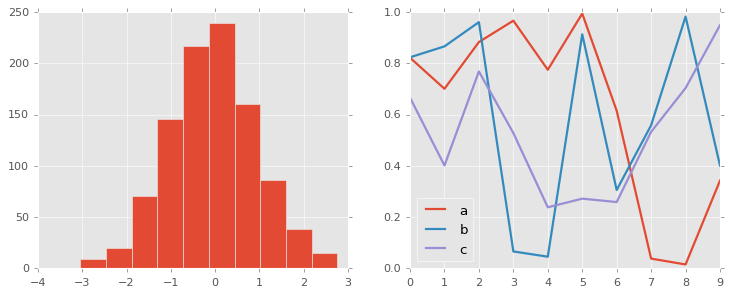

grayscale


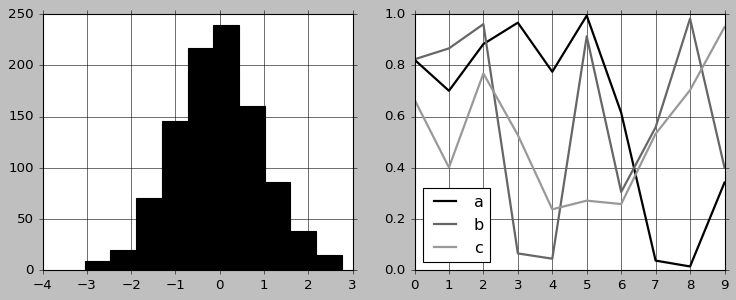

seaborn-v0_8


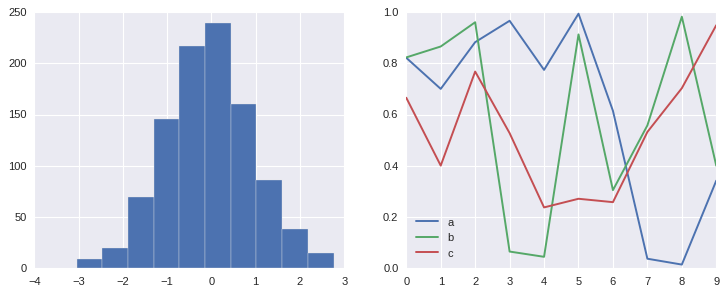

seaborn-v0_8-bright


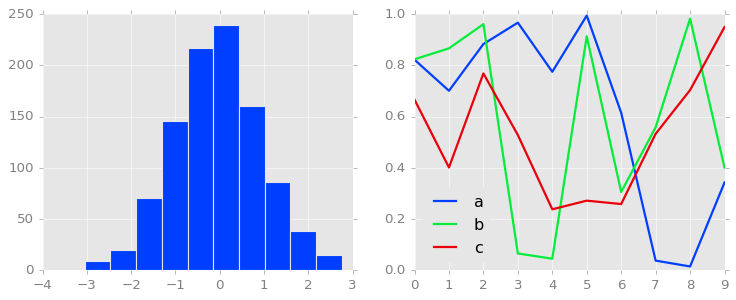

seaborn-v0_8-colorblind


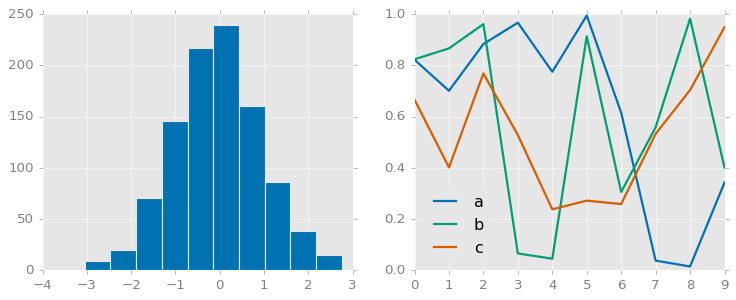

seaborn-v0_8-dark


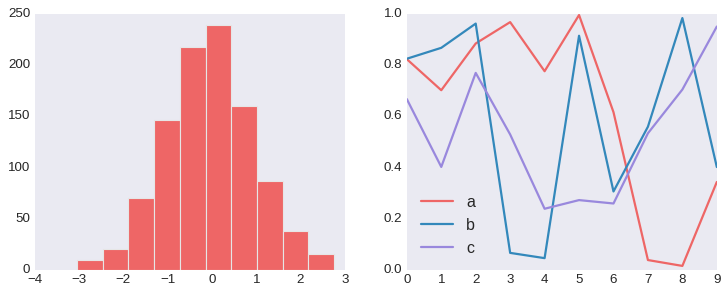

seaborn-v0_8-dark-palette


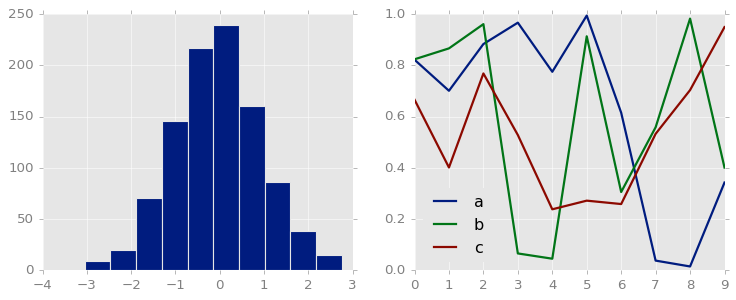

seaborn-v0_8-darkgrid


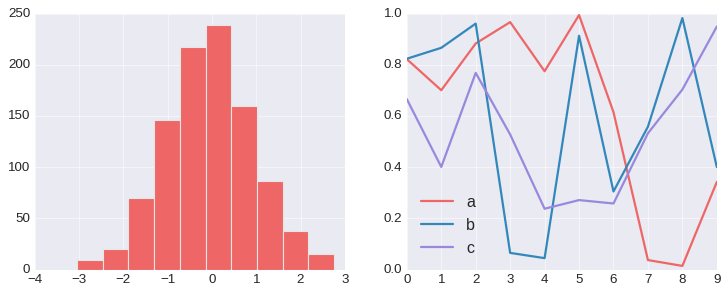

seaborn-v0_8-deep


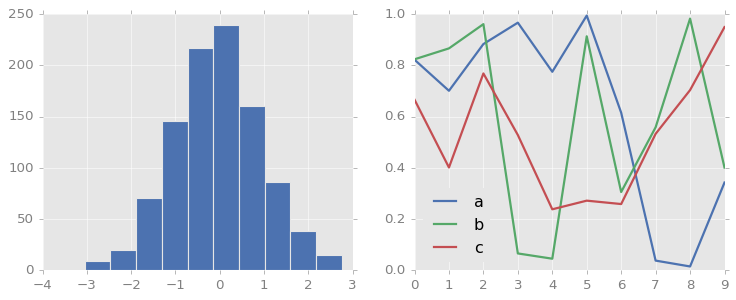

seaborn-v0_8-muted


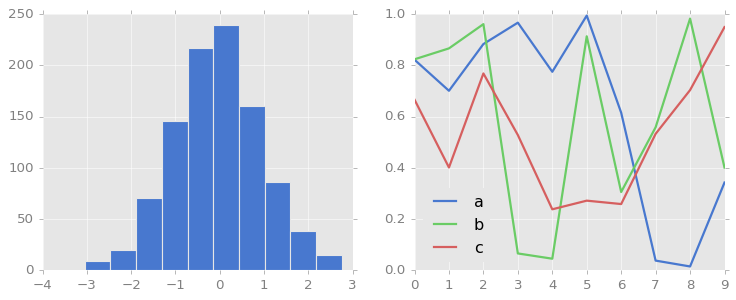

seaborn-v0_8-notebook


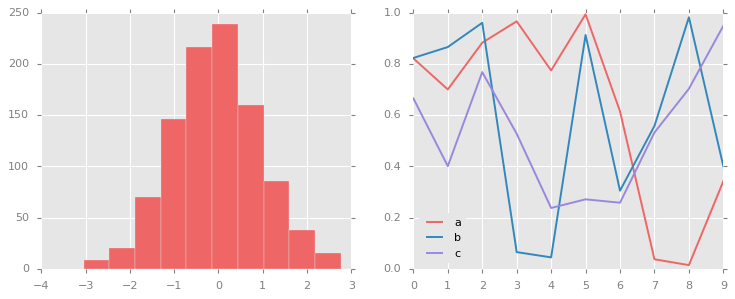

seaborn-v0_8-paper


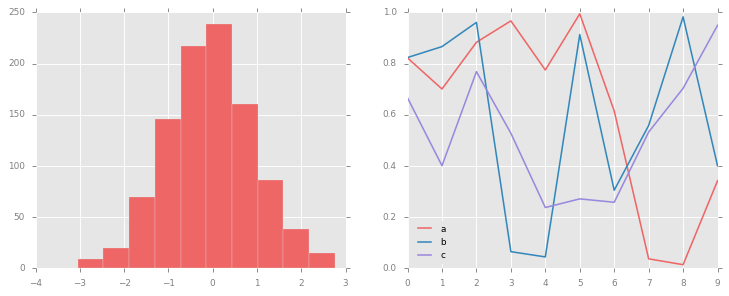

seaborn-v0_8-pastel


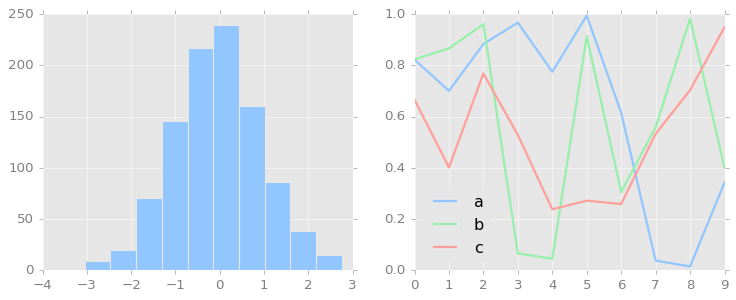

seaborn-v0_8-poster


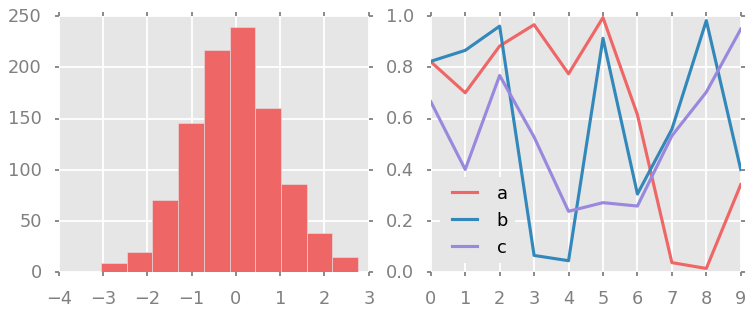

seaborn-v0_8-talk


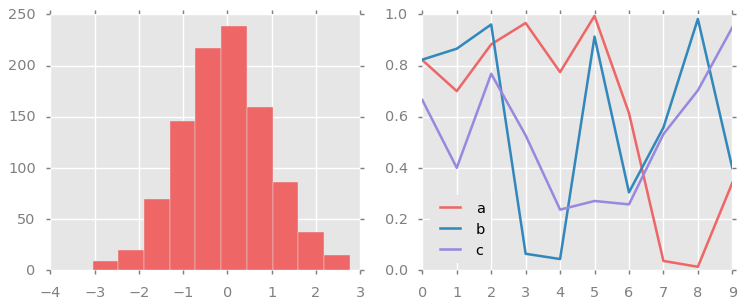

seaborn-v0_8-ticks


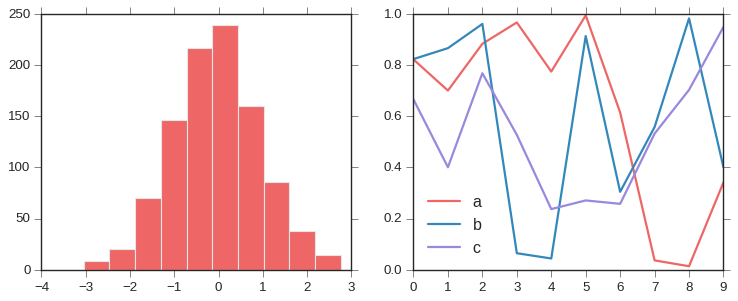

seaborn-v0_8-white


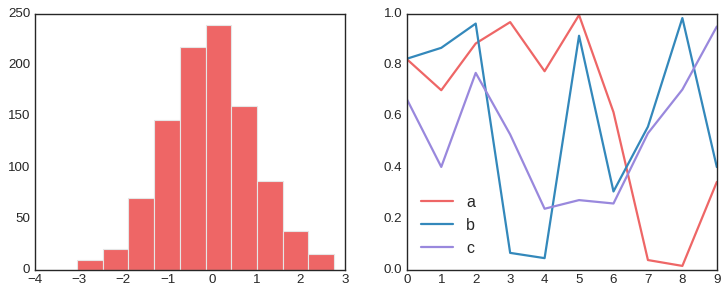

seaborn-v0_8-whitegrid


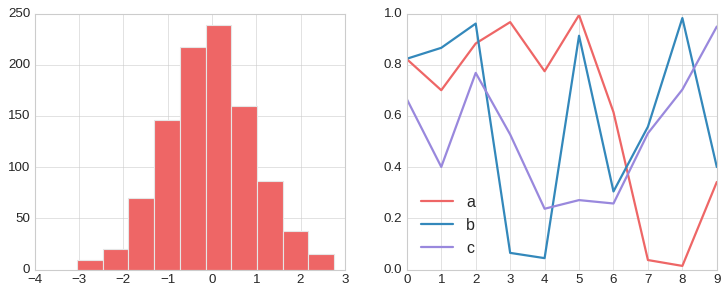

tableau-colorblind10


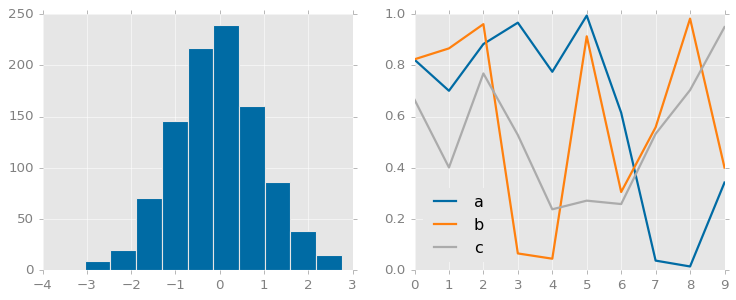

In [113]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
        ax[1].legend(['a', 'b', 'c'], loc='lower left')
    plt.show()
    plt.close()

for s in plt.style.available:
    print(s)
    with plt.style.context(s):
        hist_and_lines()